In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
path = '../data/data_cla/stars_train.csv'

In [20]:
df = pd.read_csv(path)

In [21]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,redshift,label
0,1.237659e+18,232.502422,45.121027,25.65923,22.36003,21.22009,20.18024,19.43329,0.547620,0
1,1.237654e+18,129.290210,48.672374,20.28340,20.09267,19.96514,19.58195,19.42377,1.673636,2
2,1.237656e+18,256.078422,35.629789,22.09653,22.06431,21.81846,21.55368,20.71617,1.141341,2
3,1.237679e+18,15.237270,11.871627,22.53424,21.76865,21.77098,21.59392,22.15125,0.000447,1
4,1.237665e+18,128.023708,25.454899,22.99427,21.43313,19.53053,18.75837,18.35530,0.453795,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52295 entries, 0 to 52294
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   obj_ID    52295 non-null  float64
 1   alpha     52295 non-null  float64
 2   delta     52295 non-null  float64
 3   u         52295 non-null  float64
 4   g         52295 non-null  float64
 5   r         52295 non-null  float64
 6   i         52295 non-null  float64
 7   z         52295 non-null  float64
 8   redshift  52295 non-null  float64
 9   label     52295 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 4.0 MB


In [23]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,redshift,label
count,5.229500e+04,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.00000
mean,1.237665e+18,179.950018,24.176598,22.162707,20.691976,19.676736,19.095594,18.769568,0.573293,0.56929
std,8.561793e+12,95.692902,19.417517,2.269335,2.054398,1.860475,1.752333,1.755465,0.726127,0.77704
min,1.237646e+18,0.013337,-17.636198,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971,0.00000
25%,1.237659e+18,129.158091,6.261014,20.398010,19.012810,18.176300,17.764080,17.489495,0.061434,0.00000
50%,1.237664e+18,182.750060,23.289472,22.314630,21.190710,20.164010,19.419960,19.009600,0.434668,0.00000
75%,1.237670e+18,236.194344,39.359462,23.785235,22.187810,21.069815,20.391470,19.893945,0.691771,1.00000
max,1.237681e+18,359.999615,83.000519,30.660390,31.602240,29.571860,30.250090,28.238290,7.011245,2.00000


In [24]:
df.shape

(52295, 10)

([<matplotlib.axis.XTick at 0x14a317c10>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

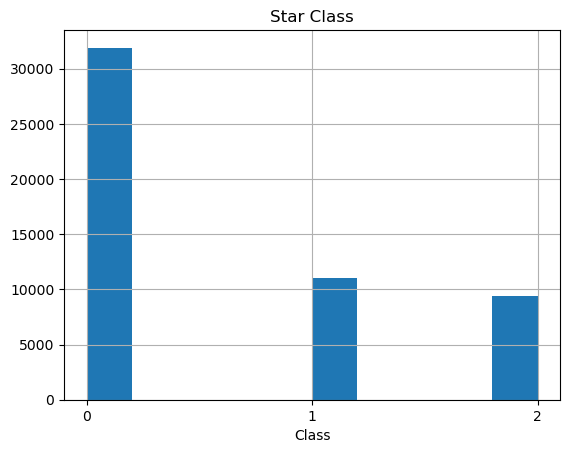

In [25]:
df['label'].hist()
plt.title('Star Class')
plt.xlabel('Class')
plt.xticks([0,1,2])

In [26]:
df.drop('obj_ID', axis=1, inplace=True)

<Axes: >

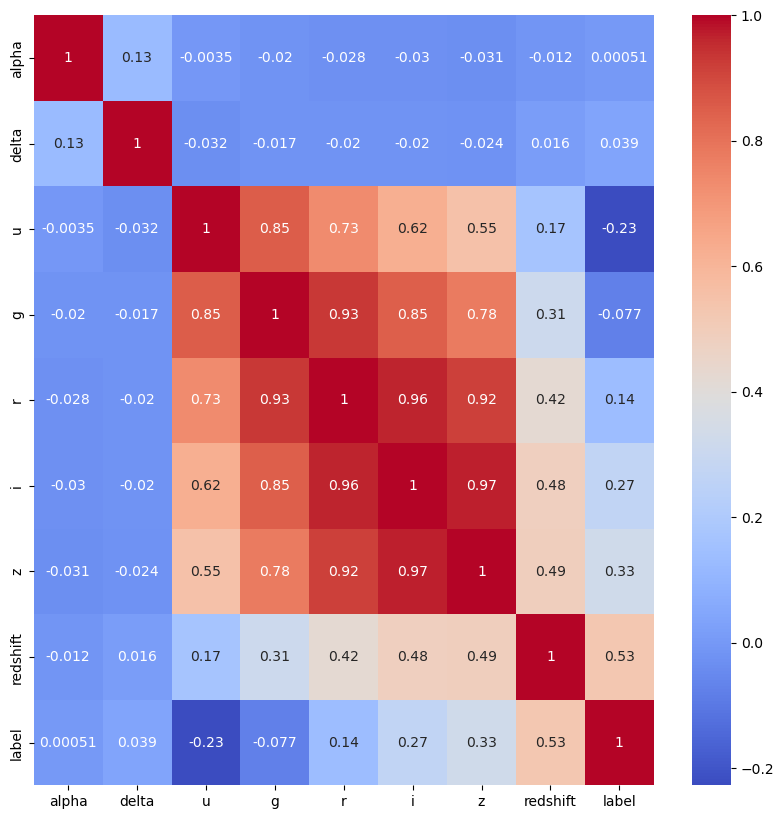

In [27]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [28]:
X = df.drop('label', axis=1)
y = df['label']

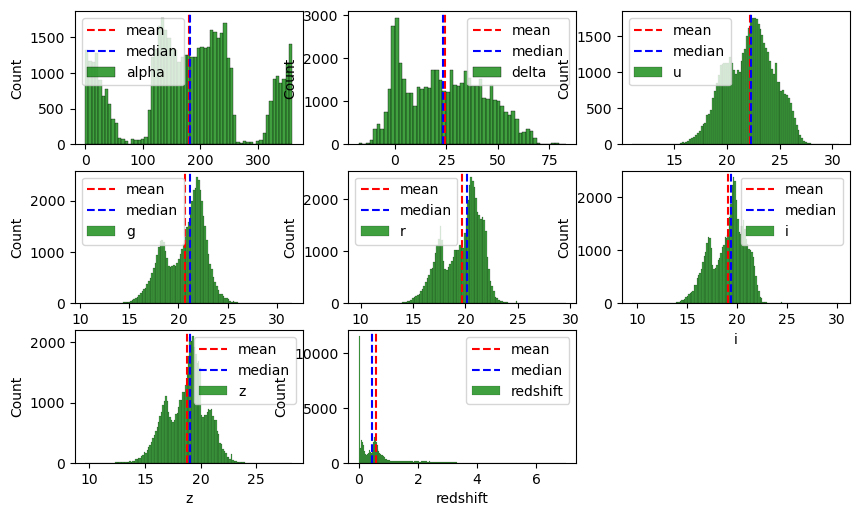

In [29]:
fig = plt.figure(figsize=(10, 10))
for i in range(len(X.columns)):
    fig.add_subplot(5, 3, i+1)
    sns.histplot(X.iloc[:, i], color='green', label=X.columns[i])
    # show the mean and median
    plt.axvline(X.iloc[:, i].mean(), linestyle='dashed', color='red', label='mean')
    plt.axvline(X.iloc[:, i].median(), linestyle='dashed', color='blue', label='median')
    plt.legend()

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [50]:
rf = RandomForestClassifier()

params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid = GridSearchCV(rf, params, cv=5, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

grid.best_params_

grid.best_score_

grid.score(X_test, y_test)

y_preds = grid.predict(X_test)

new_results = pd.DataFrame({'y_test': y_test,
                            'y_preds': y_preds})

new_results.to_csv('../résultats_models/classif/random_forest.csv', index=False)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [51]:
new_results = pd.DataFrame({'y_test': y_test,
                            'y_pred': y_preds})

new_results.to_csv('../résultats_models/classif/random_forest.csv', index=False)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7969
           1       0.99      1.00      1.00      2741
           2       0.96      0.91      0.93      2364

    accuracy                           0.98     13074
   macro avg       0.98      0.96      0.97     13074
weighted avg       0.97      0.98      0.97     13074



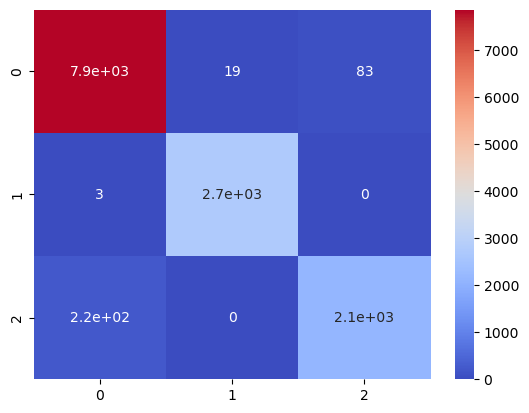

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

y_preds = grid.predict(X_test)

confusion_matrix(y_test, y_preds)

sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap='coolwarm')

print(classification_report(y_test, y_preds))

## CatBoost Classifier

In [36]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(n_estimators=3000, max_depth=10, learning_rate=0.01)
clf.fit(X_train, y_train, verbose=True)

clf.score(X_test, y_test)

0:	learn: 1.0810909	total: 40.7ms	remaining: 2m 2s
1:	learn: 1.0638731	total: 59ms	remaining: 1m 28s
2:	learn: 1.0473299	total: 83.6ms	remaining: 1m 23s
3:	learn: 1.0312461	total: 103ms	remaining: 1m 16s
4:	learn: 1.0159702	total: 122ms	remaining: 1m 13s
5:	learn: 1.0006403	total: 140ms	remaining: 1m 9s
6:	learn: 0.9858213	total: 158ms	remaining: 1m 7s
7:	learn: 0.9711038	total: 175ms	remaining: 1m 5s
8:	learn: 0.9569197	total: 194ms	remaining: 1m 4s
9:	learn: 0.9431126	total: 212ms	remaining: 1m 3s
10:	learn: 0.9295441	total: 231ms	remaining: 1m 2s
11:	learn: 0.9163638	total: 250ms	remaining: 1m 2s
12:	learn: 0.9034520	total: 280ms	remaining: 1m 4s
13:	learn: 0.8908660	total: 300ms	remaining: 1m 4s
14:	learn: 0.8783341	total: 319ms	remaining: 1m 3s
15:	learn: 0.8663116	total: 338ms	remaining: 1m 3s
16:	learn: 0.8547173	total: 358ms	remaining: 1m 2s
17:	learn: 0.8431372	total: 377ms	remaining: 1m 2s
18:	learn: 0.8319007	total: 396ms	remaining: 1m 2s
19:	learn: 0.8209776	total: 414ms	re

0.9767477436132782

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7862
           1       0.99      1.00      0.99      2812
           2       0.96      0.93      0.94      2400

    accuracy                           0.98     13074
   macro avg       0.98      0.97      0.97     13074
weighted avg       0.98      0.98      0.98     13074



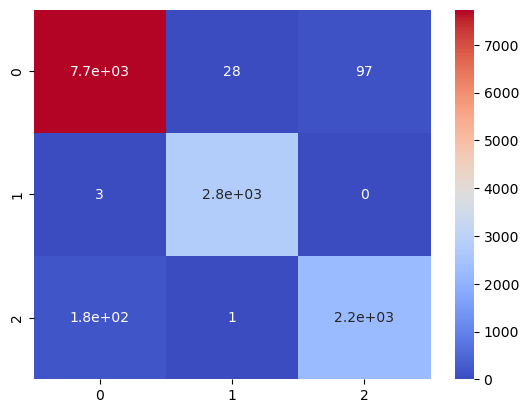

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap='coolwarm')

print(classification_report(y_test, y_preds))

In [44]:
new_res = pd.DataFrame({'y_test': y_test, 'y_pred': y_preds.ravel()})

new_res.to_csv('../résultats_models/classif/catboost.csv')

## With Normalization

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# random forest
clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)

clf.score(X_test_scaled, y_test)

0.9762888175003824

In [48]:
#catboost

clf = CatBoostClassifier(n_estimators=3000, max_depth=10, learning_rate=0.01)
clf.fit(X_train_scaled, y_train, verbose=False)

clf.score(X_test_scaled, y_test)

y_preds = clf.predict(X_test_scaled)

new_res = pd.DataFrame({'y_test': y_test, 'y_pred': y_preds.ravel()})

new_res.to_csv('../résultats_models/classif/catboost_scaled.csv')

## Submit Predictions

In [29]:
X_train = df.drop(['label', 'obj_ID'], axis=1)
y_train = df['label']

test_path = 'data_cla/stars_test.csv'
df_test = pd.read_csv(test_path)

obj_id = df_test['obj_ID']
df_test.drop('obj_ID', axis=1, inplace=True)

X_test = df_test

In [30]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

In [32]:
y_preds.shape

(25758,)

In [35]:
naive = pd.read_csv('data_cla/random_answer.csv')

In [36]:
naive['label'] = y_preds

In [37]:
naive.to_csv('data_cla/stars_preds_2.csv', index=False)

In [38]:
naive['label'].value_counts()

label
0    15869
1     5459
2     4430
Name: count, dtype: int64

In [40]:
naive = pd.read_csv('data_cla/random_answer.csv')

In [46]:
type(naive['label'][0])

numpy.int64

In [51]:
naive['label'] = y_preds.astype(int)

In [52]:
naive.to_csv('data_cla/stars_preds_3.csv', index=False)